# Haberman's Survival Data Set

Dataset contains cases from study conducted on the survival of patients who had undergone surgery for breast cancer

In [1]:
# Importing the Libraries
# data processing, CSV file I/O (e.g. pd.read_csv)
import pandas as pd
# linear algebra
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Importing the dataset
data = pd.read_csv("C:\\Users\\PUNEET SINGH\\haberman.csv",header=None,names=['age','treatment_year',
                                                                             'axillary nodes','Survival'])
data.head()

,age,treatment_year,axillary nodes,Survival
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [3]:
# In the data Feature 'Survival' is the Target Varibale and We can see it is a classification Problem.
# Summary of the data
data.describe()

,age,treatment_year,axillary nodes,Survival
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


In [4]:
# Checking the info of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
age               306 non-null int64
treatment_year    306 non-null int64
axillary nodes    306 non-null int64
Survival          306 non-null int64
dtypes: int64(4)
memory usage: 9.6 KB


In [5]:
# From this info we can see that data type of the data is (int) and there is no null values in the data

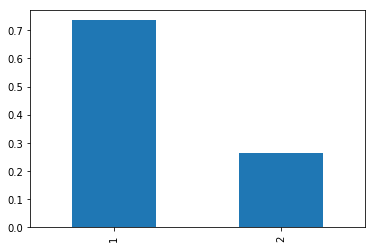

In [6]:
# Checking the value count of the Target variable
data['Survival'].value_counts(normalize=True).plot.bar()

In [7]:
# From the plot we can see that the data is unbalanced 
# where  1 = the patient survived 5 years or longer
# 2 = the patient died within 5 year

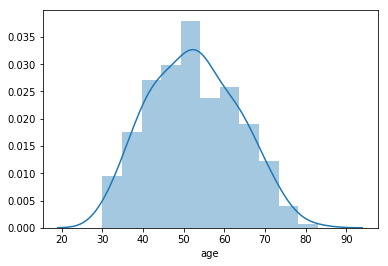

In [8]:
# Checking for the Normality of the features in the dataset
sns.distplot(data['age'])

In [9]:
# From the distplot we can see that Feature 'Age' is Normalized

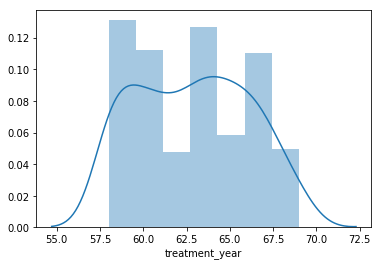

In [10]:
sns.distplot(data['treatment_year'])

In [11]:
# From the distplot we can see that Feature 'treatment_year' is not normalized but it not skewed also

In [12]:
# Finding the Correaltion between the features
corr_df  = data.corr()
corr_df

,age,treatment_year,axillary nodes,Survival
age,1.000000,0.089529,-0.063176,0.067950
treatment_year,0.089529,1.000000,-0.003764,-0.004768
axillary nodes,-0.063176,-0.003764,1.000000,0.286768
Survival,0.067950,-0.004768,0.286768,1.000000


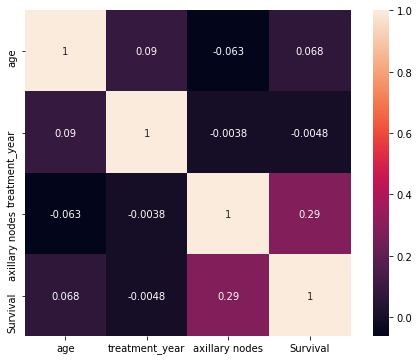

In [13]:
plt.figure(figsize=(8,6),)
sns.heatmap(corr_df,annot=True,square=True)
plt.show()

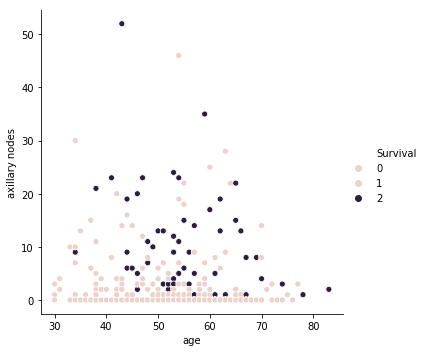

In [14]:
# From the correlation matrix we can see that feature 'axillary nodes' is negatively corelated to the Feature 'Age'
sns.relplot(x = 'age',y='axillary nodes',hue='Survival',data=data)
# Finding the relation between between the two features with respect to the Target variable

In [15]:
# From the relation plot it is clear that almost every age person is between the 0-10 Axillary nodes

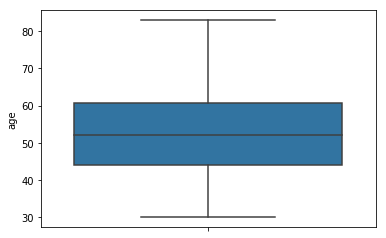

In [16]:
# Checking the Ouliers in the Feature 
sns.boxplot(x='age',hue='Survival',data=data,orient="v")

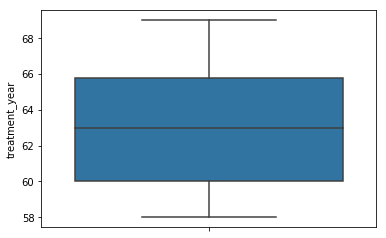

In [17]:
sns.boxplot(x='treatment_year',hue='Survival',data=data,orient="v")

In [18]:
# Dividing the data into Independent and Dependent variables
X = data.drop('Survival',axis=1)
# X= Independent variable
y = data['Survival']
# y = Depedent Variable

In [19]:
# Standardizing the data through Standard Scaler
# Importing the Library
from sklearn.preprocessing import StandardScaler
# Splitting the Data into Train,test set
# Importing the Libray
from sklearn.model_selection import train_test_split

In [20]:
X= StandardScaler().fit_transform(X)

In [21]:
# Splitting the data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42,stratify=y,)

In [22]:
# Importing the Measure Metrics
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score

In [25]:
# Function for the score measure
def score_of_model(y_test,y_pred,X_test, model):
    print("Accuracy score : \n",accuracy_score(y_test,y_pred))
    print("Confusion Matrix : \n",confusion_matrix(y_test,y_pred))
    print("Classification Report : \n",classification_report(y_test,y_pred))

In [28]:
# Function of the model
def classification_models(X,y):
    from sklearn.linear_model import LogisticRegression
    lg = LogisticRegression(random_state=42)
    lg.fit(X_train,y_train)
    y_pred = lg.predict(X_test)
    print(score_of_model(y_test, y_pred, X_test, lg))
    return lg
classification_models = classification_models(X,y)

Accuracy score : 
 0.6774193548387096
Confusion Matrix : 
 [[41  5]
 [15  1]]
Classification Report : 
               precision    recall  f1-score   support

           1       0.73      0.89      0.80        46
           2       0.17      0.06      0.09        16

   micro avg       0.68      0.68      0.68        62
   macro avg       0.45      0.48      0.45        62
weighted avg       0.59      0.68      0.62        62

None


From the report we can see that Accuracy score of the model is 67.7% but as the Data was not balanced
So we can consider other measure metrics instead of accuracy score
F1 score of the model is good as it is 0.80 % 

In [35]:
#similarly define a function for random forest regressor
from sklearn.ensemble import RandomForestClassifier
def RandomForestClassifierModel(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=42, test_size=0.3,stratify=y)
    rf = RandomForestClassifier(n_estimators=35,random_state=42)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    print(score_of_model(y_test, y_pred, X_test, rf))
    return rf
RandomForestClassifierModel = RandomForestClassifierModel(X,y)

Accuracy score : 
 0.6739130434782609
Confusion Matrix : 
 [[57 11]
 [19  5]]
Classification Report : 
               precision    recall  f1-score   support

           1       0.75      0.84      0.79        68
           2       0.31      0.21      0.25        24

   micro avg       0.67      0.67      0.67        92
   macro avg       0.53      0.52      0.52        92
weighted avg       0.64      0.67      0.65        92

None


In [36]:
# We can see that our Logistic Regression model is predicting bette than our Random Forest model

In [37]:
#similarly define a function for Decision tree classifier
from sklearn.tree import DecisionTreeClassifier
def DecisionTreeClassifierModel(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=42, test_size=0.3,stratify=y)
    dtc = DecisionTreeClassifier(criterion='entropy',max_depth=5,random_state=42)
    dtc.fit(X_train, y_train)
    y_pred = dtc.predict(X_test)
    print(score_of_model(y_test, y_pred, X_test, dtc))
    return dtc
DecisionTreeClassifierModel = DecisionTreeClassifierModel(X,y)

Accuracy score : 
 0.6739130434782609
Confusion Matrix : 
 [[57 11]
 [19  5]]
Classification Report : 
               precision    recall  f1-score   support

           1       0.75      0.84      0.79        68
           2       0.31      0.21      0.25        24

   micro avg       0.67      0.67      0.67        92
   macro avg       0.53      0.52      0.52        92
weighted avg       0.64      0.67      0.65        92

None


From the report we can see that 
Logistic Regression has predicted best among the three models as the F1 score of the Logistic is best

HYPERPARAMETER TUNING 

In [45]:
# Applying the GridSearchCV on the RandomForestModel
# Importing the Library
from sklearn.model_selection import GridSearchCV
# Importing the Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
param = [{'n_estimators':[30,40,50],'criterion':['entropy','gini'],'max_depth':[3,4,5,6,7,8,9]}]
grid_search = GridSearchCV(estimator=rf,param_grid=param,scoring='f1',n_jobs=-1)

In [46]:
grid_search.fit(X_train,y_train)
grid_search.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


array([1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1,
       1, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [47]:
print("Best score of the model :",grid_search.best_score_)
print("Best parameter of the model :",grid_search.best_params_)

Best score of the model : 0.8452877875476417
Best parameter of the model : {'criterion': 'gini', 'max_depth': 4, 'n_estimators': 40}


 We can that after appyling the Hyper parameter Tuning on the Random Forest Classifier
 
 f1 score is changed from 79% to 84.5% which is good.
 best paramters has to  be refit on the Random Forest Classifier Model

In [52]:
# Refitting the paramters
from sklearn.ensemble import RandomForestClassifier
def RandomForestClassifierModel(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y)
    rf = RandomForestClassifier(n_estimators=40,criterion='gini', max_depth= 4)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    print(score_of_model(y_test, y_pred, X_test, rf))
    return rf
RandomForestClassifierModel = RandomForestClassifierModel(X,y)

Accuracy score : 
 0.7903225806451613
Confusion Matrix : 
 [[44  2]
 [11  5]]
Classification Report : 
               precision    recall  f1-score   support

           1       0.80      0.96      0.87        46
           2       0.71      0.31      0.43        16

   micro avg       0.79      0.79      0.79        62
   macro avg       0.76      0.63      0.65        62
weighted avg       0.78      0.79      0.76        62

None


In [53]:
# from hyper paramter tuning we can also see that accuracy score of the model changed from 67.3 % to 79.03 % which is almost 
# equal to 80% which is very good 
# Saving the best Model 
# Saving the Random Forest Model as it has predicted the best 
# Importing Pickle
import pickle
filehandler = open("Project_40.obj","wb")
# saving the model in pickel string
saved_rf_model = pickle.dump(rf,filehandler)
filehandler.close()